# 运筹第九次作业
杨小诺 2018011495 自83

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, diff

## 1、t的求解过程—牛顿迭代法进行精确搜索

$$t_{k+1}=t_{k}-{\dot{f}(t_{k})\over \ddot{f}(t_{k})}$$

注意：  
1、此处设定误差限：$10^{-4}$  

In [157]:
def newtonMethod(x, y, D):
    t_cur = 0
    t = symbols('t', real = True) 
    while True:
        # 分子
        num = float( diff((1 - (x + t * D[0]))**2 + 2 * (((x + t * D[0])**2 - (y + t * D[1]))**2), t, 1).subs({t:t_cur}) )
        # 分母
        den = float( diff((1 - (x + t * D[0]))**2 + 2 * (((x + t * D[0])**2 - (y + t * D[1]))**2), t, 2).subs({t:t_cur}) )
        t_new = t_cur - num / den
        if abs(t_new - t_cur) < 1e-10:
            break
        t_cur = t_new
    return t_cur

## 2、D的求解过程—共使用五种方法
  
  共使用五种方法求解，具体公式见下方↓

若使用$l_1$，$D$为：
$$
\begin{cases}
sgn(-\frac{\partial{f(X)}}{\partial{x_i}})& {|\frac{\partial{f(X)}}{\partial{x_i}}|=||\nabla{f(X)}||_\infty}\\
0& else
\end{cases}
$$

若使用$l_2$，$D$为:
$$D=-\nabla{f(X)}$$

若使用$l_\infty$，$D$为：
$$D=-sgn(\nabla{f(X)})$$

In [158]:
# 本题中，所有x_d都表示，对x求一阶导
# 本题中，所有y_d都表示，对y求一阶导
def find_D_L1(x_d, y_d):
    max_xy = max(abs(x_d), abs(y_d))
    if abs(x_d) == max_xy:
        D = [-np.sign(x_d), 0]
    else:
        D = [0, -np.sign(y_d)]
    return D

def find_D_L2(x_d, y_d):
    return [-x_d, -y_d]

def find_D_Li(x_d, y_d):
    D = [-np.sign(x_d), -np.sign(y_d)]
    return D

若使用$F-R$，$D$为:$$D_k=-\nabla{f(X_k)}+\alpha_{k-1} D_{k-1}$$ $$\alpha_k=\frac{||\nabla{f(X_{k+1})}||^2}{||\nabla{f(X_{k})}||^2}$$
$$D_1 = -\nabla{f(X_0)}$$

若使用$P-R$法，$D$为:$$D_k=-\nabla{f(X_k)}+\alpha_{k-1} D_{k-1}$$ $$\alpha_k=\frac{\nabla{f(X_{k})}^T \big(\nabla{f(X_{k+1})}-\nabla{f(X_{k})} \big)}{||\nabla{f(X_{k})}||^2}$$
$$D_1 = -\nabla{f(X_0)}$$

注：以上两方法的区别主要在$\alpha$的计算上，并且，k%2==0时，直接返回：$$-\nabla{f(X_k)}$$

In [159]:
# 本题中，所有x_d都表示，对x求一阶导
# 本题中，所有y_d都表示，对y求一阶导
def find_D_FR(x_d, y_d, x_d_old, y_d_old, k):
    if k % 2 == 0:
        return [-x_d, -y_d]  
    a = (x_d**2 + y_d**2) / (x_d_old**2 + y_d_old**2)
    D = [0, 0]
    D[0] = -x_d + a * (-x_d_old)
    D[1] = -y_d + a * (-y_d_old)#mdmdmdmdmdmdmdmdmdmdmdmdmdmdmdmd
    return D

def find_D_PR(x_d, y_d, x_d_old, y_d_old, k):
    if k % 2 == 0:
        return [-x_d, -y_d] 
    a = (x_d * ( x_d - x_d_old) + y_d * (y_d - y_d_old)) / (y_d_old**2 + x_d_old**2)  # 替换a即可
    D = [0, 0]
    D[0] = -x_d + a * (-x_d_old)
    D[1] = -y_d + a * (-y_d_old)
    return D


## 3、绘图函数
共绘制两种图片：1、等高线图；2、函数值变化图

In [160]:
def plot_contour(x_list, y_list, func):
    x = np.arange(-0.1, 1.1, 0.01)
    y = np.arange(-0.1, 1.1, 0.01)
    X, Y = np.meshgrid(x, y)
    my_contour = plt.contour(X, Y, func(X, Y), 25)
    plt.plot(x_list, y_list, c = 'red')
    plt.clabel(my_contour, fontsize = 5)
    plt.show()

def plot_f(f_list):
    x = [i for i in range(len(f_list))]
    plt.title("函数值随迭代次数增加的变化曲线",fontproperties='SimHei')
    plt.xlabel('ep')
    plt.ylabel('f')
    plt.plot(x, f_list)
    plt.show()

## 4、算法实现
算法实现流程如下：  
1、取初始点x=y=0，迭代次数cnt=0  
2、如果误差满足要求$||\nabla{f(X_{k})}||_2 < 10^{-4}$，停止计算，否则  
3、由上方函数，搜索D  
4、由上方函数，搜索t  
5、由t和D，计算$X_{k+1}=X_k+t_k D_k$   
6、返回2  

其他细节：  
1、在函数中调用f(x,y)用以求某点处的函数值  
2、算法实现过程中，需要保留上一轮迭代的一阶导数  
3、调用上方函数画图，输出结果见下方

--------------------L1---------------------
最优解 x = 0.9999, y = 0.9998
最优函数值: 1.0161802119091436e-08
迭代次数：  133


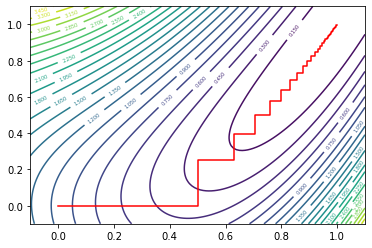

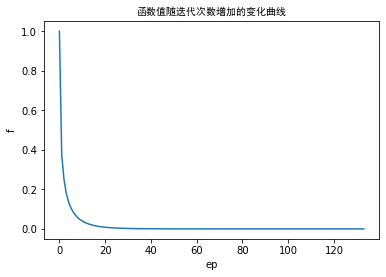

--------------------L2---------------------
最优解 x = 0.9999, y = 0.9998
最优函数值: 1.0161806815684785e-08
迭代次数：  133


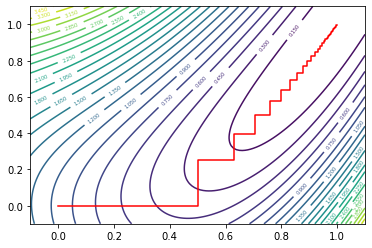

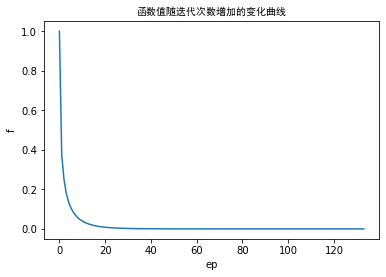

--------------------Li---------------------
最优解 x = 0.9999, y = 0.9998
最优函数值: 9.798738888334973e-09
迭代次数：  100


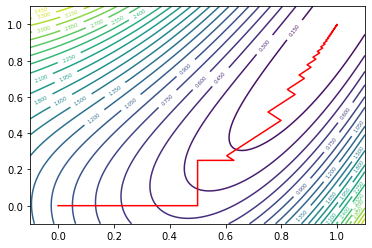

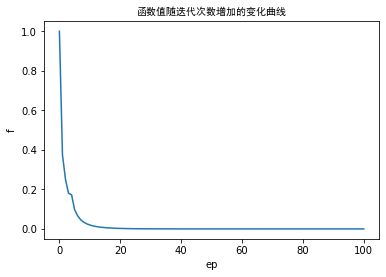

--------------------FR---------------------
最优解 x = 1.0000, y = 1.0000
最优函数值: 2.3882987916449888e-18
迭代次数：  2


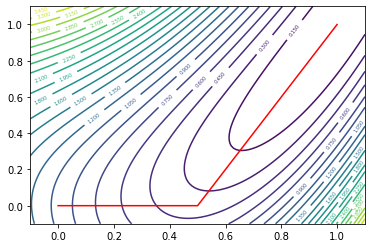

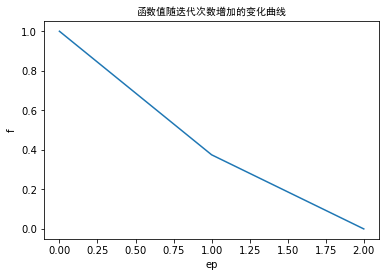

--------------------PR---------------------
最优解 x = 1.0000, y = 1.0000
最优函数值: 8.59787564992196e-19
迭代次数：  2


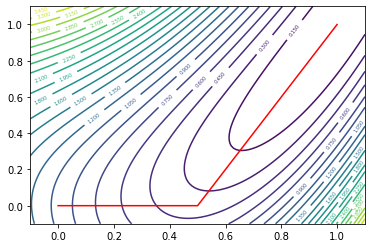

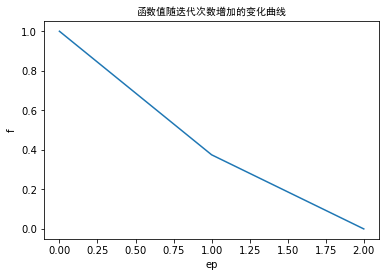

In [162]:
# 初始值
x0,y0 = 0,0

# 解决问题的函数
def my_func(method):
    # 求解f(x,y)
    def f(x, y):
        return (1-x)**2 + 2*(x**2-y)**2
    # 初值
    xx = x0
    yy = y0
    # 用来求导
    x, y = symbols('x y', real=True)
    xx_d = float((2 * (x - 1) + 8 * x * (x ** 2 - y)).subs({x:xx, y: yy}))
    yy_d = float((4 * (y - x ** 2)).subs({x:xx, y: yy}))
    # 用来保留一次数值，FR和PR要用
    xx_d_old = 0
    yy_d_old = 0
    
    # 列表存过程中的值
    x_list = []
    y_list = []
    f_list = []
    # 存初值
    x_list.append(xx)
    y_list.append(yy)
    f_list.append(f(xx,yy))
    # 用来计数
    cnt = 0
    while True:
        # 求D-----------------------------------------------------------------------------------
        if (method == 'L1'):
            D = find_D_L1(xx_d, yy_d)
        elif (method == 'L2'):
            D = find_D_L2(xx_d, yy_d)
        elif (method == 'Li'):
            D = find_D_Li(xx_d, yy_d)
        elif (method == 'FR'):
            D = find_D_FR(xx_d, yy_d, xx_d_old, yy_d_old, cnt)
        elif (method == 'PR'):
            D = find_D_PR(xx_d, yy_d, xx_d_old, yy_d_old, cnt)

        # 求t-----------------------------------------------------------------------------------
        t = newtonMethod(xx, yy, D)
        
        # 更新x,y-------------------------------------------------------------------------------
        xx = xx +t * D[0]
        yy = yy +  t * D[1]
        x_list.append(xx)
        y_list.append(yy)
        f_list.append(f(xx,yy))
        
        # 迭代一下导数值，主要是PR和FR需要使用
        xx_d_old = xx_d
        yy_d_old = yy_d
        xx_d = float((2 * (x - 1) + 8 * x * (x ** 2 - y)).subs({x:xx, y: yy}))
        yy_d = float((4 * (y - x ** 2)).subs({x:xx, y: yy}))
        
        cnt+=1
        
        if np.linalg.norm(np.array([xx_d, yy_d]))<1e-4:
            break

    print('最优解 x = %.4f, y = %.4f' % (xx, yy))
    print('最优函数值:' , f(xx,yy))
    print('迭代次数： ',cnt)
    plot_contour(x_list, y_list, f)
    plot_f(f_list)

print("--------------------L1---------------------")
my_func('L1')
print("--------------------L2---------------------")
my_func('L2')
print("--------------------Li---------------------")
my_func('Li')
print("--------------------FR---------------------")
my_func('FR')
print("--------------------PR---------------------")
my_func('PR')

## 5、结果比较与分析  
结果说明：  
1、上方结果包含：最优解、最优值、迭代次数、两幅图片  
2、FR和PR的结果中，最优函数值已经小于$10^{-15}$，可与看做0，也就是这两种方法下求出的最优值为0  
  
比较与分析： 
从结果来看，FR和PR法明显更为准确，而且这两种方法的收敛速度更快。最速下降方法结果略差一些，未达到最优解，而且需要迭代的次数更多。  
可见，本问题更适合 用共轭梯度法求解，省时省力结果更好。